In [3]:
import pandas as pd
import numpy as np

#Define o número total de produtos, e cria um dicionário de produtos com IDs, nomes e categorias aleatórias
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': [f'Produto{i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Cria um Dataframe a partir do dicionário de produtos
df_produtos = pd.DataFrame(produtos)

# Define o número total de vendas, cria um dicionário de vendas com datas, IDs de produtos, qunatidade e valores aleatórios
num_vendas = 1000 # Define o total de vendas
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas), #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas), #
    'valor_total': np.random.randint(1000, 10000, num_vendas) #
}

# Cria um DataFrame a partir do dicionário de vendas
df_vendas = pd.DataFrame(data_vendas)

# Salva os dataframes de vendas e produtos em arquivos CSV
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Lê os arquivos CSV de vendas e produtos com dataframes
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Mescla os dataframe de vendas e produtos com base de ID do produto
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salva o dataframe mesclado como um arquivo CSV chamado 'data_warehouse.csv'
df_merge.to_csv('data_warehouse.csv', index=False)

# Lê o aquivo CSV do data warehouse como um dataframe, imprime "conteúdo do Data warehouse:" com as tabelas de data warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data warehouse:")
print(df_warehouse)

Conteúdo do Data warehouse:
           data  produto_id  quantidade  valor_total        nome    categoria
0    2024-04-08         481         109         2109  Produto481  Eletrônicos
1    2024-04-19         481          70         8070  Produto481  Eletrônicos
2    2024-04-12         481          64         5930  Produto481  Eletrônicos
3    2024-04-09         150         199         3739  Produto150    Alimentos
4    2024-04-09          83         188         1973   Produto83  Eletrônicos
..          ...         ...         ...          ...         ...          ...
995  2024-04-22         540          93         9187  Produto540    Alimentos
996  2024-04-17         499          57         4694  Produto499    Alimentos
997  2024-04-17         430         174         5904  Produto430       Roupas
998  2024-04-22         430         195         3691  Produto430       Roupas
999  2024-04-09          27         167         8235   Produto27    Alimentos

[1000 rows x 6 columns]


Análise de vendas por produto:
            quantidade  valor_total
nome                               
Produto10          179        12212
Produto100         390        22538
Produto101         343        15665
Produto102         241         2760
Produto103         383        21575
...                ...          ...
Produto92          172         5025
Produto94          256        14685
Produto96          523        30897
Produto97          472        18317
Produto98          190        10047

[484 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         35559      1684662
Eletrônicos       42195      1811166
Roupas            45021      2022584

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        5454       255658
2024-04-02        3726       186509
2024-04-03        4718       209478
2024-04-04        3042       1332

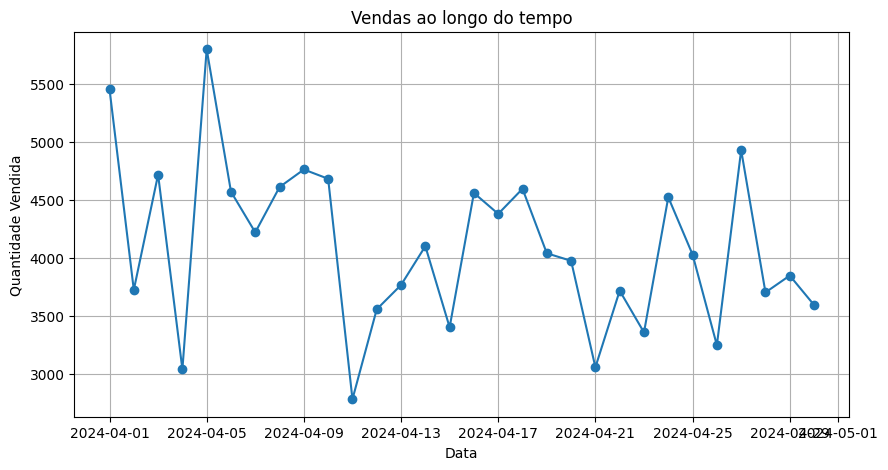


Análise de desempenho de produtos:
nome
Produto10     12212
Produto100    22538
Produto101    15665
Produto102     2760
Produto103    21575
              ...  
Produto92      5025
Produto94     14685
Produto96     30897
Produto97     18317
Produto98     10047
Name: valor_total, Length: 484, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo CSV do data warehouse como DataFrame
df_warehouse = pd.read_csv('data_warehouse.csv')

# Agruda as vendas por produto e calcula a quantidade e valor total vendido para cada Produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupa as vendas por categoria de produto e calcula a quantidade e valor total vendido para cada categoria
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Converte a coluna de data para o formate datetime, Agrupa as vendas por data e calcula a quantidade e valor total vendidod para a cada data
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

# Plota um gráfico de linha para mostrar as vendas ao longo do tempo
plt.figure(figsize=(10,5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o',linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Agrupa o desempenho de cada produto calculando o valor total vendido para cada um
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

In [20]:
# COMEÇO DO CODIGO DATALAKE

import pandas as pd
import numpy as np
import os


# Verifica se a pasta 'data_lake' existe e, se não, cria a pasta
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

# Gera dados e salva cada conjunto de dados em um arquivo csv
num_files = 10
num_rows_per_file = 1000

# Lista para armazenar os dataframes e os nomes dos arquivos
dfs = []

# Loop para gerar dados para cada arquivo
for i in range(num_files):
  # Gera dados aleatórios para as colunas 'coluna1', 'coluna2' e 'coluna3'
  data = {
      'coluna1': np.random.randint(0, 100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)

  }
  # Cria um dataframe a partir dos dados gerados
  df = pd.DataFrame(data)

  # Define o nome do arquivo usando o número do loop e salva o dataframe como um arquivo CSV
  file_name = f'data_lake/dados_{i+1}.csv'
  df.to_csv(file_name, index=False)

  # Armazena o nome do arquivo e o dataframe na lista 'dfs'
  dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# Loop para imprimir os primeiros cinco registros de cada arquivo
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())

Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0        7 -1.092702       C
1       19 -0.072253       B
2       21  1.187431       C
3       58 -1.231007       C
4       84 -0.651755       B

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       33 -0.584059       B
1       37  0.722225       C
2       70  1.005706       B
3       73  1.158760       C
4       74  0.611076       C

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       51  0.151058       C
1       44  1.662625       A
2       60 -1.344722       A
3       97  0.080656       C
4       40  1.525385       A

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       86 -0.404524       C
1       20  2.612956       C
2       47  0.442497       A
3       36  0.502270       A
4       41  0.491867       B

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       98 -2.220587     

Primeiras linas do DataFrame:
   coluna1   coluna2 coluna3
0       20 -0.849887       A
1       67 -0.619765       B
2       59  1.586131       B
3       36 -0.147757       B
4       26  1.096491       C

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     51.595000     0.032633
std      29.372874     1.004958
min       0.000000    -3.192291
25%      25.000000    -0.661801
50%      53.500000     0.064767
75%      77.000000     0.719707
max      99.000000     3.215616


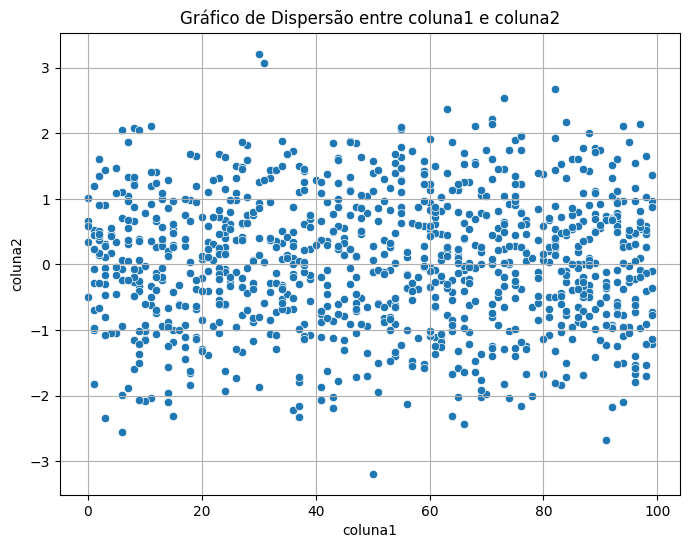

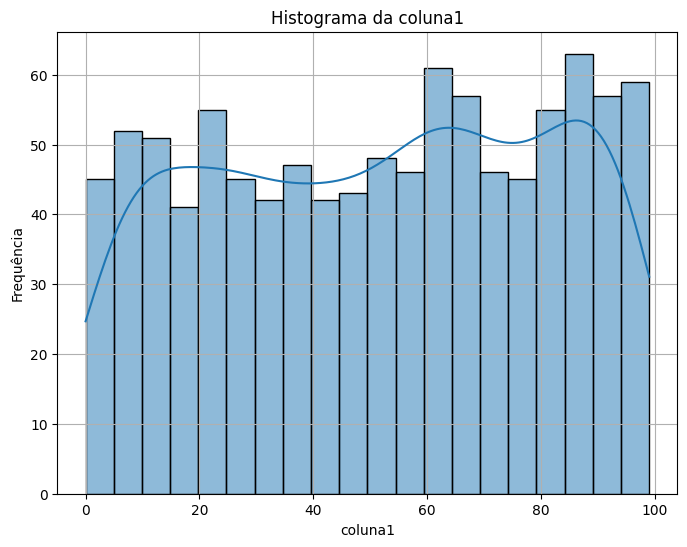

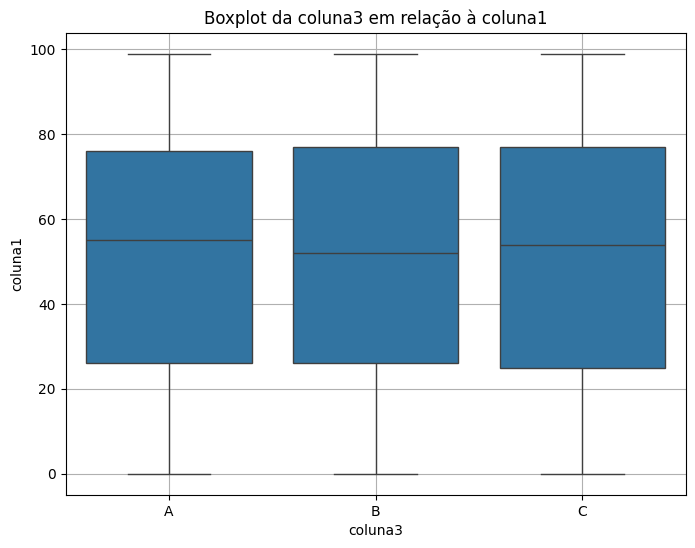

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Configuração da conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Nome da tabela a ser lida do banco de dados
table_name = 'dados_1'

# Lê os dados da tabela 'dados_1' do banco de dados para um dataframe

#df = pd.read_sql_table(table_name, engine)

# Imprime as primeiras linhas do dataframe
print("Primeiras linas do DataFrame:")
print(df.head())

# Imprimei informações sobre o dataframe (tipo de dados, valores nulos, etc.)
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprime um resumo estatístico do dataframe (contagem, média, desvio padrão, etc.)
print("\nResumo estatístico do DataFrame:")
print(df.describe())

#
# Plota um gráfico de dispersão entre 'coluna1' e 'coluna2' usando seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Plota um histograma da coluna 'coluna1' usando seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Plota um boxplot da 'coluna1' em relação à 'coluna3' usando seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
